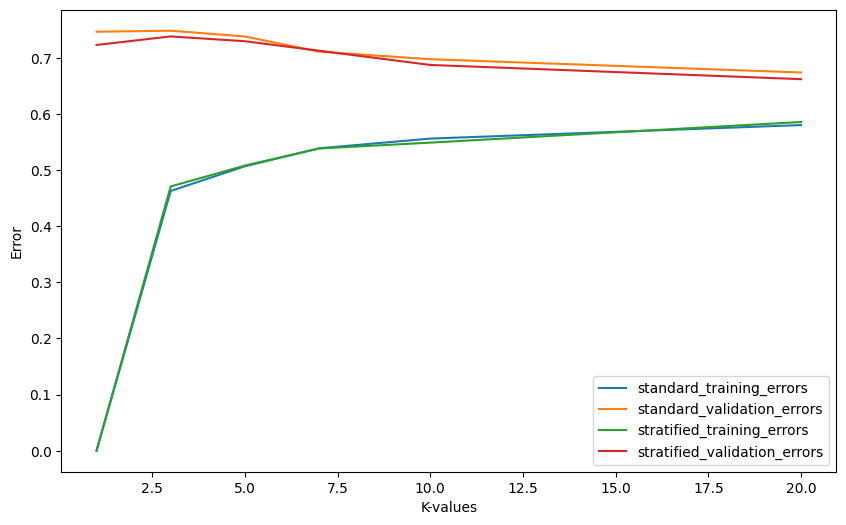

20
0.7181208053691275
MLPClassifier(hidden_layer_sizes=(10, 10, 10))


              precision    recall  f1-score   support

           0       0.30      0.28      0.29        32
           1       0.23      0.24      0.23        38
           2       0.41      0.29      0.34        38
           3       0.27      0.34      0.30        41

    accuracy                           0.29       149
   macro avg       0.30      0.29      0.29       149
weighted avg       0.30      0.29      0.29       149

mean validation: 0.3564307078763709


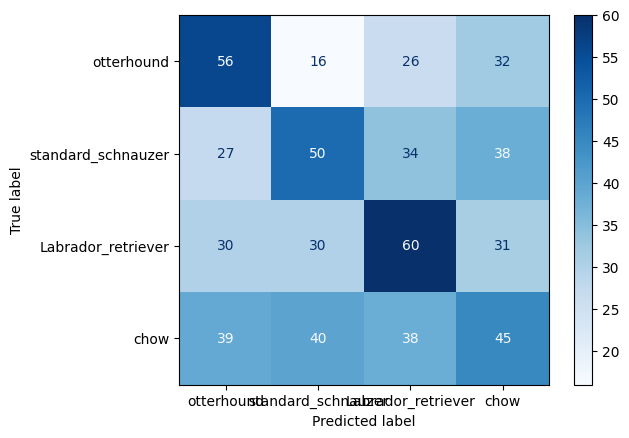

RandomForestClassifier()


              precision    recall  f1-score   support

           0       0.38      0.38      0.38        32
           1       0.25      0.29      0.27        38
           2       0.37      0.34      0.36        38
           3       0.29      0.27      0.28        41

    accuracy                           0.32       149
   macro avg       0.32      0.32      0.32       149
weighted avg       0.32      0.32      0.32       149

mean validation: 0.34972226178607035


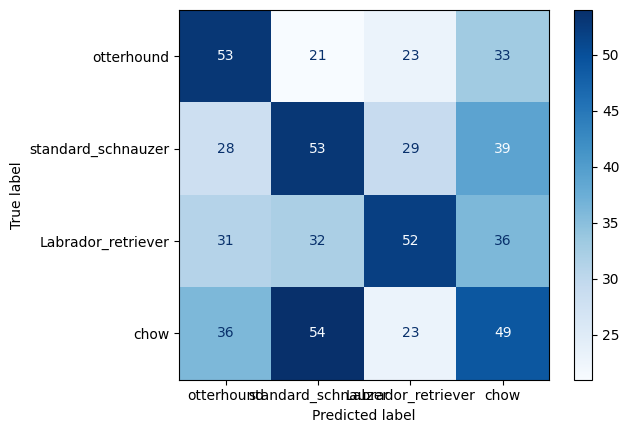

GaussianNB()


              precision    recall  f1-score   support

           0       0.33      0.50      0.40        32
           1       0.30      0.50      0.38        38
           2       0.43      0.24      0.31        38
           3       0.35      0.15      0.21        41

    accuracy                           0.34       149
   macro avg       0.35      0.35      0.32       149
weighted avg       0.35      0.34      0.32       149

mean validation: 0.3430138156957698


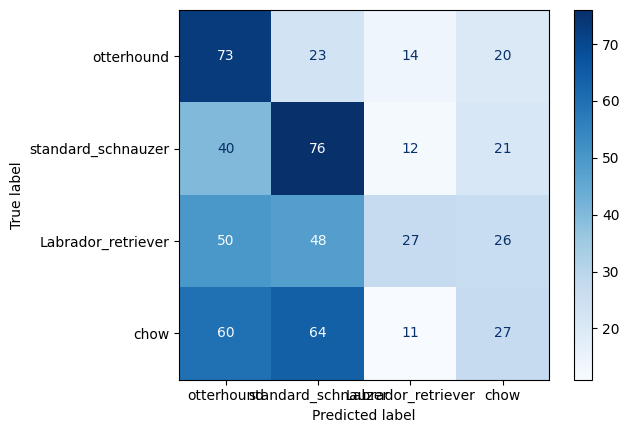

In [18]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,KFold
from skimage import filters,io,color,exposure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.naive_bayes import GaussianNB
import warnings 
warnings.filterwarnings("ignore")  


image_dir=r'Cropped'
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)
X = []
Y = []
image_dir = r"C:\Users\mohan\Desktop\Cropped"
for index,dog in enumerate(os.listdir(image_dir)):
    path=os.path.join(image_dir,dog)
    for file in os.listdir(path):
        img    = io.imread(os.path.join(path,file.strip()))
        gray_img=  color.rgb2gray(img)
        image = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
        hist,_=exposure.histogram(image, nbins=36)
        X.append(hist)
        Y.append(index)
X=np.array(X)
Y=np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42,stratify=Y)
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
K_values = [1,3,5,7,10, 20]
standard_training_errors=[]
standard_validation_errors=[]
standardkfold = KFold(n_splits=5)
for k in K_values:
    knn = KNeighborsClassifier(k)    
    train = []
    validation = []
    for traini, testi in standardkfold.split(X_train, y_train):
        xtrain, xval = X_train[traini], X_train[testi]
        ytrain, yval = y_train[traini], y_train[testi]
        knn.fit(xtrain, ytrain)
        trainpred = knn.predict(xtrain)
        valpred = knn.predict(xval)
        train_acc = accuracy_score(ytrain, trainpred)
        val_acc = accuracy_score(yval, valpred)
        train.append(1 - train_acc)  
        validation.append(1 - val_acc) 
    standard_training_errors.append(np.mean(train))
    standard_validation_errors.append(np.mean(validation))
stratified_training_errors=[]
stratified_validation_errors=[]
stratified=StratifiedKFold(n_splits=5)
for k in K_values:
    knn = KNeighborsClassifier(k)    
    train = []
    validation = []
    for traini, testi in stratified.split(X_train, y_train):
        xtrain, xval = X_train[traini], X_train[testi]
        ytrain, yval = y_train[traini], y_train[testi]
        knn.fit(xtrain, ytrain)
        trainpred = knn.predict(xtrain)
        valpred = knn.predict(xval)
        train_acc = accuracy_score(ytrain, trainpred)
        val_acc = accuracy_score(yval, valpred)
        train.append(1 - train_acc)  
        validation.append(1 - val_acc) 
    stratified_training_errors.append(np.mean(train))
    stratified_validation_errors.append(np.mean(validation))
plt.figure(figsize=(10, 6))
plt.plot(K_values, standard_training_errors, label='standard_training_errors')
plt.plot(K_values, standard_validation_errors, label='standard_validation_errors')
plt.plot(K_values, stratified_training_errors, label='stratified_training_errors')
plt.plot(K_values, stratified_validation_errors, label='stratified_validation_errors')
plt.xlabel('K-values')
plt.ylabel('Error')
plt.legend()
plt.show()
sk=K_values[np.argmin(stratified_validation_errors)]
print(sk)
#test error 
model=KNeighborsClassifier(sk)
model.fit(X_train,y_train)
pred=model.predict(X_test)
err=1-accuracy_score(y_test,pred)
print(err)
methods = [ MLPClassifier(hidden_layer_sizes=(10, 10, 10)),
    RandomForestClassifier(),
    GaussianNB()  # Adding Gaussian Naive Bayes classifier
]
for clf in methods:
    print(str(clf)+"\n\n")
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    confu_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(report)
    truelabels, predictlabels, cm, val_a = [], [], [], []
    for traini, testi in stratified.split(X_train, y_train):
        xtrain, xval = X_train[traini], X_train[testi]
        ytrain, yval = y_train[traini], y_train[testi]

        clf.fit(xtrain, ytrain)
        p = clf.predict(xval)

        truelabels.extend(yval)
        predictlabels.extend(p)
        val_a.append(accuracy_score(yval, p))
    print("mean validation: " + str(np.mean(val_a)))
    cm.append(confusion_matrix(truelabels, predictlabels))
    cm_display = ConfusionMatrixDisplay(confusion_matrix=sum(cm)/len(cm), display_labels=['otterhound', 'standard_schnauzer', 'Labrador_retriever', 'chow'])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()



In [16]:
# The lowest mean errors occur at 𝑘=1 for the standard method and 𝑘=7 for the stratified.
# Model complexity in k-Nearest Neighbor increases with lower 𝑘, risking overfitting, while higher 𝑘 simplifies the model.
# A balance at 𝑘=7 minimizes errors without overfitting or underfitting.

In [13]:
# GaussianNB seems to be the best classifier out of the three in terms of correctly distinguishing distinct dog breeds,
# according to both the classification reports and the confusion matrix displays.
# With fewer misclassifications and comparatively balanced performance across classes,
# it attains the best mean validation accuracy.

In [ ]:
# RandomForestClassifier best based on mean validation accuracy

In [ ]:
# RandomForestClassifier is best based on Test accuracy.

In [ ]:
#RandomForestClassifier is best based on F1 Score.


In [ ]:
#Reference :
    https://scikit-image.org/docs/stable/api/skimage.exposure.html
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html